## Graphing with pandas, matplotlib and seaborn

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [155]:
path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'EPL_201819_rev_stad.csv'

df = pd.read_csv(path + file)

## pandas

### boxplot

In [156]:
df[:4]

,team,2018-19_goals,2018-19_revenue ($M),lat,long
0,Manchester City,95,655,53.483137,-2.200395
1,Liverpool,89,649,53.430827,-2.960836
2,Arsenal,73,478,51.554877,-0.108435
3,Tottenham Hotspur,67,559,51.603208,-0.065740


In [157]:
df.columns = ['team', 'goals', 'revenue_mill', 'lat', 'long']

In [158]:
df.goals.describe()

count    20.000000
mean     53.600000
std      18.071204
min      22.000000
25%      44.250000
50%      51.500000
75%      63.500000
max      95.000000
Name: goals, dtype: float64

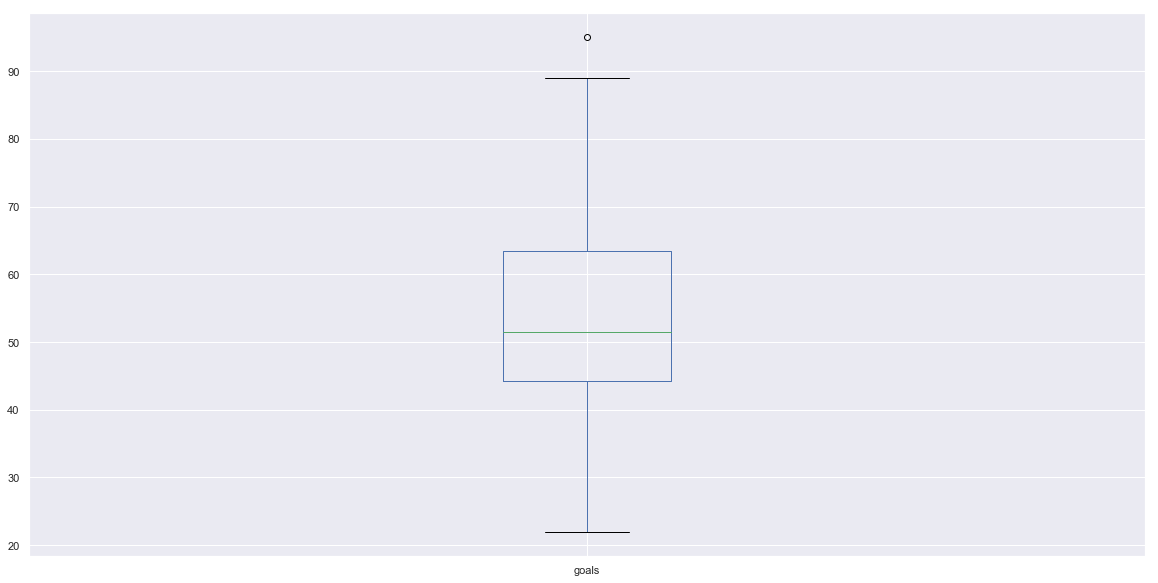

In [159]:
df.boxplot('goals', return_type='axes', figsize = (20, 10))

### bar chart

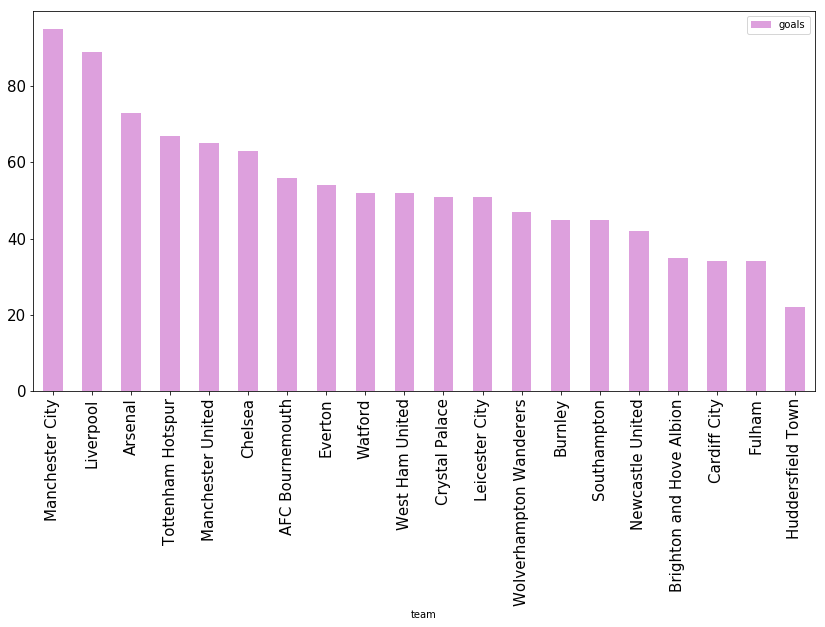

In [52]:
df.plot.bar(x = 'team', y = 'goals', figsize = (14, 7), color = "plum", fontsize = (15))

### scatterplot

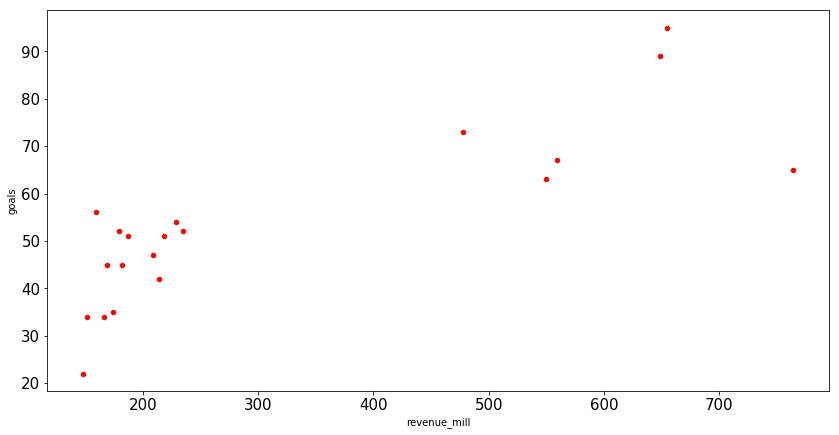

In [53]:
df.plot.scatter(x = 'revenue_mill', y = 'goals', figsize = (14, 7), color = "r", fontsize = (15))

## matplotlib

### histogram

> Histograms are used to show distributions of variables while bar charts are used to compare variables. [...] Histograms plot quantitative data with ranges of the data grouped into bins or intervals while bar charts plot categorical data. — Naomi Robbins

In [160]:
# how many values have we got in 'revenue'?

len(df.revenue_mill)

20

In [161]:
df.revenue_mill.describe()

count     20.000000
mean     313.800000
std      206.405477
min      148.000000
25%      172.750000
50%      211.500000
75%      496.000000
max      764.000000
Name: revenue_mill, dtype: float64

In [153]:
df.sort_values(by = 'revenue_mill', ascending = True)

,team,goals,revenue_mill,lat,long
19,Huddersfield Town,22,148,53.654271,-1.768374
17,Cardiff City,34,152,51.472858,-3.203058
6,AFC Bournemouth,56,159,50.735243,-1.838306
18,Fulham,34,166,51.474895,-0.221801
13,Burnley,45,169,53.788987,-2.230198
16,Brighton and Hove Albion,35,174,50.861497,-0.084017
8,Watford,52,179,51.649873,-0.401329
14,Southampton,45,182,50.905435,-1.391183
10,Crystal Palace,51,187,51.398310,-0.085402
12,Wolverhampton Wanderers,47,209,52.590236,-2.130422


(array([14.,  2.,  4.]),
 array([148.        , 353.33333333, 558.66666667, 764.        ]),
 <a list of 3 Patch objects>)

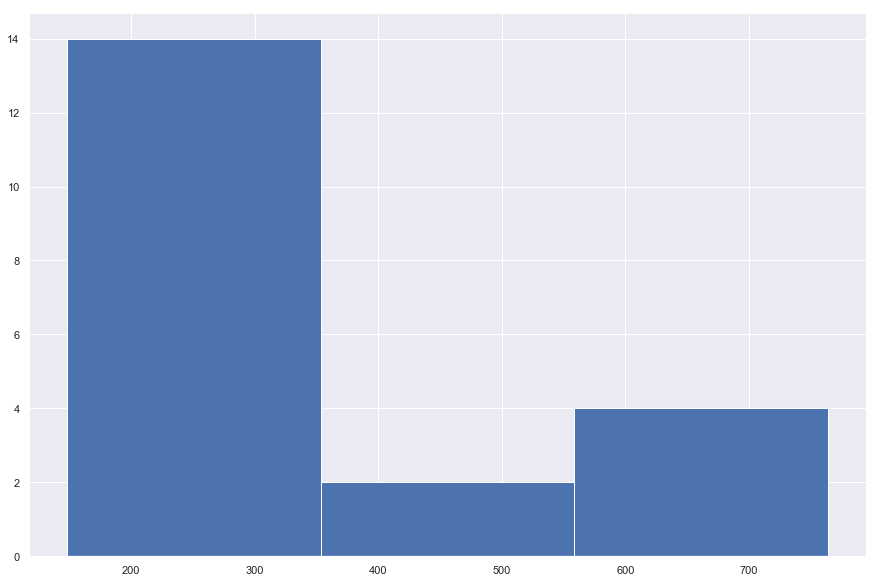

In [148]:
# histogram from a list, with 3 bins?

plt.hist(df.revenue_mill, 3)


(array([14.,  0.,  1.,  2.,  3.]),
 array([148. , 271.2, 394.4, 517.6, 640.8, 764. ]),
 <a list of 5 Patch objects>)

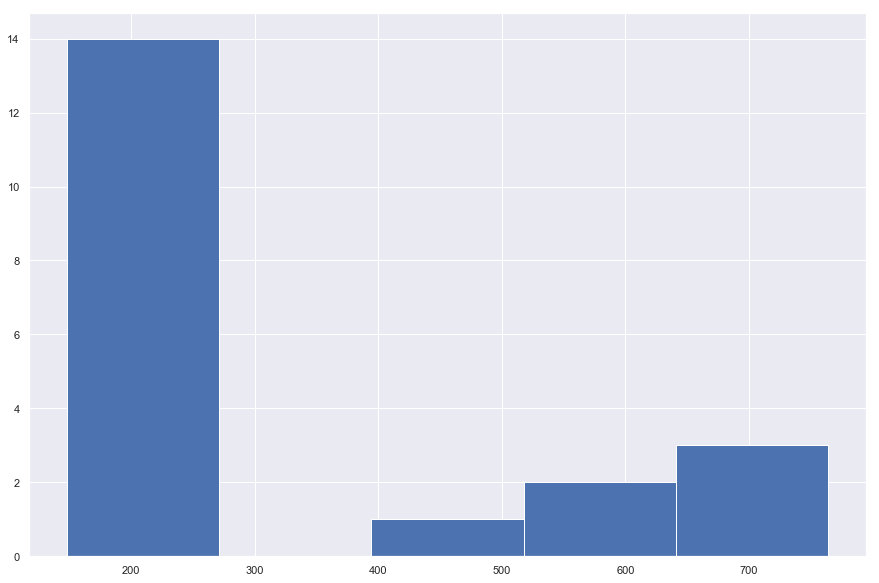

In [152]:
# histogram from a list, with 5 bins

plt.hist(df.revenue_mill, 5)


### line graph

In [105]:
path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'cardiff_weather.csv'

wdf = pd.read_csv(path + file)

In [106]:
average_rain = wdf.groupby('Year')['Rain (mm)'].mean()[:-1]

In [107]:
last = wdf[wdf['Year'] == 2018]

In [108]:
last['Rain (mm)'].sum()

1191.6000000000001

In [109]:
average_rain

Year
1977     90.125000
1978     84.358333
1979     91.741667
1980     99.641667
1981     96.091667
1982     97.216667
1983     88.616667
1984     91.808333
1985     96.750000
1986     99.916667
1987     85.041667
1988     97.191667
1989     88.258333
1990     83.366667
1991     83.233333
1992     88.050000
1993     95.066667
1994    113.875000
1995     88.733333
1996     83.850000
1997    102.741667
1998    116.725000
1999    114.408333
2000    125.350000
2001     94.583333
2002    114.275000
2003     70.941667
2004     96.583333
2005     82.883333
2006     94.141667
2007    107.566667
2008    109.175000
2009     99.908333
2010     70.691667
2011     77.458333
2012    124.700000
2013     94.625000
2014    116.441667
2015    109.183333
2016     99.316667
2017     85.041667
2018     99.300000
Name: Rain (mm), dtype: float64

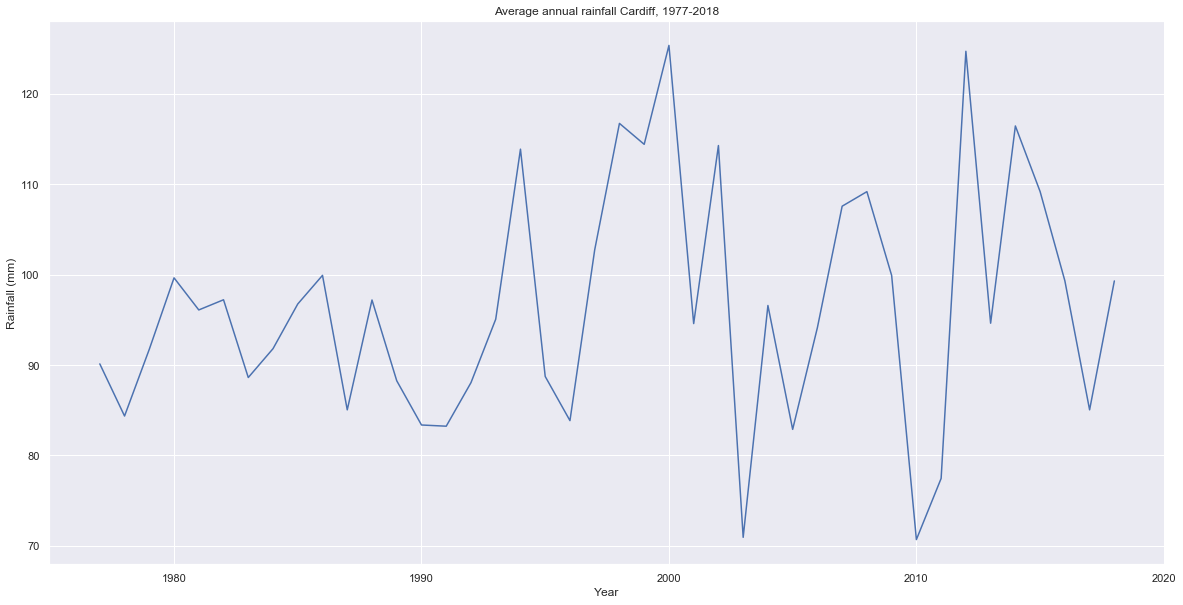

In [117]:

fig, ax = plt.subplots(figsize = (20,10))

plt.title("Average annual rainfall Cardiff, 1977-2018")
plt.plot(average_rain)
plt.xlabel ('Year')
plt.ylabel('Rainfall (mm)')

# run this before the .show() to save locally
plt.savefig('weather_annual')

plt.show()


## Seaborn

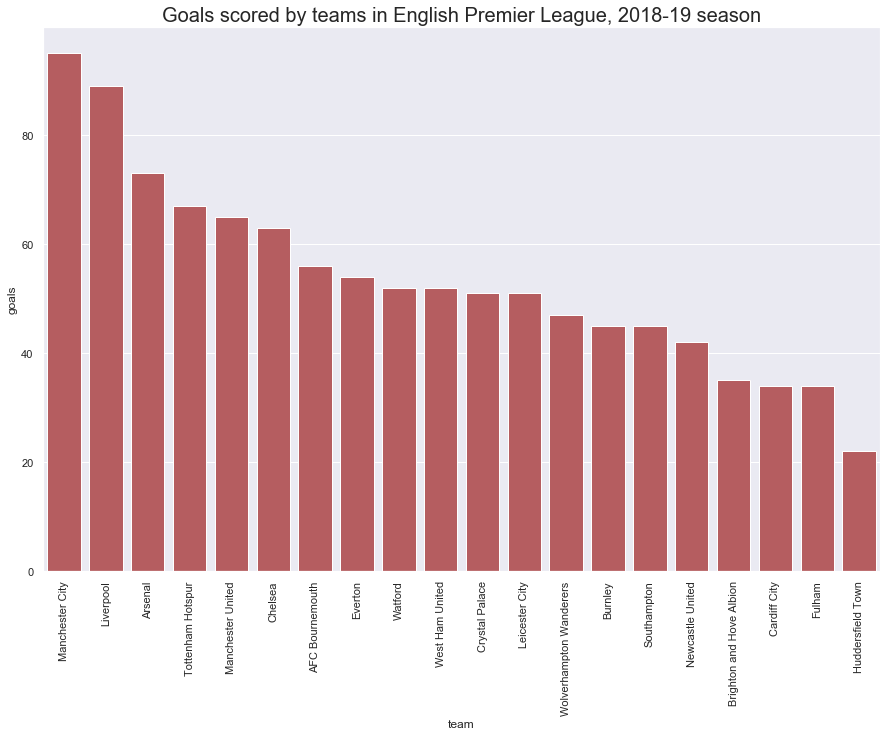

In [143]:
sns.set(rc={'figure.figsize':(15, 10)})

plt.xticks(rotation = 'vertical')

plt.title('Goals scored by teams in English Premier League, 2018-19 season', fontsize = 20)

sns.barplot(df.team, df.goals, color = 'r')